# Orbit tests

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gala.dynamics as gd
import gala.potential as gp
import astropy.coordinates as coord
import astropy.units as u

import paths
from utils import sample_rows

## Define reference frame and potential

In [2]:
# Define galactocentric coordinate frame
with coord.galactocentric_frame_defaults.set('v4.0'):
    galcen_frame = coord.Galactocentric()
galcen_frame

<Galactocentric Frame (galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    (266.4051, -28.936175)>, galcen_distance=8.122 kpc, galcen_v_sun=(12.9, 245.6, 7.78) km / s, z_sun=20.8 pc, roll=0.0 deg)>

In [3]:
# Define solar position, velocity
sun_xyz = u.Quantity(
    [-galcen_frame.galcen_distance, 0 * u.kpc, galcen_frame.z_sun]
)
sun_vxyz = galcen_frame.galcen_v_sun
sun_vxyz

<CartesianDifferential (d_x, d_y, d_z) in km / s
    (12.9, 245.6, 7.78)>

In [4]:
sun_w0 = gd.PhaseSpacePosition(pos=sun_xyz, vel=sun_vxyz)

In [5]:
# Use default 4-component gala potential model
mw_potential = gp.MilkyWayPotential()
for k, pot in mw_potential.items():
    print(f'{k}: {pot!r}')

disk: <MiyamotoNagaiPotential: m=6.80e+10 solMass, a=3.00 kpc, b=0.28 kpc (kpc,Myr,solMass,rad)>
bulge: <HernquistPotential: m=5.00e+09 solMass, c=1.00 kpc (kpc,Myr,solMass,rad)>
nucleus: <HernquistPotential: m=1.71e+09 solMass, c=0.07 kpc (kpc,Myr,solMass,rad)>
halo: <NFWPotential: m=5.40e+11 solMass, r_s=15.62 kpc, a=1.00 , b=1.00 , c=1.00  (kpc,Myr,solMass,rad)>


In [6]:
# Compute the Sun's orbit for 4 Gyr (~16 orbits)
sun_orbit = mw_potential.integrate_orbit(sun_w0, dt=0.5 * u.Myr, t1=0, t2=4 * u.Gyr)

        Use name instead. [gala.dynamics.core]


## Test with one star

In [7]:
mwm_data = pd.read_csv(paths.data / 'MWM' / 'MWM_RGB.csv')
mwm_data

/var/folders/_s/lknhlnjn1g1cj388brpgztf80000gn/T/ipykernel_55787/2795415640.py:1: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  mwm_data = pd.read_csv(paths.data / 'MWM' / 'MWM_RGB.csv')


,sdss_id,sdss4_apogee_id,gaia_dr2_source_id,gaia_dr3_source_id,tic_v8_id,healpix,lead,version_id,catalogid,catalogid21,...,c_n,e_c_n,gal_r,gal_phi,gal_z,galpy_r_guide,galpy_z_max,galpy_ecc,galpy_E,galpy_Lz
0,54381291,NaN,421495278551818624,421495278551818624,403218924,16384,tic_v8,25,27021597850714872,4291430952,...,-0.256311,0.024055,12.439019,153.313414,-0.663968,12.222205,0.703732,0.014642,-25272.458243,2564.722834
1,54381397,NaN,421505552113500800,421505552113500800,369831391,16384,tic_v8,25,27021597850723334,4291439436,...,-0.198570,0.024895,10.447799,161.379103,-0.379658,10.506503,0.506564,0.143261,-30486.022363,2245.499245
2,54381405,NaN,421506067509558016,421506067510359808,369831290,16384,tic_v8,25,27021597850724078,4291440182,...,-0.332730,0.018693,10.274266,162.308315,-0.351110,8.760375,0.532926,0.224887,-36536.627138,1911.999891
3,54381758,2M00204981+5625073,421540152367477248,421540152367477248,403307163,16385,gaia_dr3_source,31,63050394783216344,4291448641,...,-0.236124,0.024095,12.096207,154.781406,-0.610219,11.985890,1.989756,0.028805,-25026.240407,2521.123098
4,54381959,2M00224114+5636475,421557607115380608,421557607115380608,403393455,16025,gaia_dr3_source,31,63050394783222145,4291878516,...,-0.371770,0.015182,9.110510,170.227131,-0.163923,8.566006,0.227114,0.170685,-38634.632478,1874.115098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178300,129060878,2M11484212-6220219,5334808943135705600,5334808943135705600,324668848,185355,gaia_dr3_source,31,63050395882762275,5762936654,...,-0.430750,0.023164,7.492782,-141.850596,-0.016213,6.137214,0.027250,0.189417,-53346.952200,1379.630757
178301,129060884,2M09110058-4849577,5326021096449688064,5326021096449688064,364057991,172356,gaia_dr3_source,31,63050395875982757,5802300216,...,-0.322500,0.020773,9.207778,-151.641683,-0.014818,5.354831,0.043301,0.432860,-51779.280078,1208.103473
178302,129060885,2M08333243-3911278,5529360241405866752,5529360241405866752,185021879,160694,gaia_dr3_source,31,63050395950945615,5800869040,...,-0.341250,0.023480,9.899075,-154.976288,0.061825,8.439482,0.310362,0.169676,-39217.032992,1849.352832
178303,129060909,2M13582184-6202236,5866253799616922112,5866253799616922112,325588166,185382,gaia_dr3_source,31,63050396108514375,5632820971,...,-0.577520,0.020591,6.623241,-160.900700,0.007032,7.240775,0.014861,0.100803,-46906.742932,1610.019725


In [8]:
test_star = mwm_data[mwm_data['sdss_id'] == 129060878].iloc[0]
test_star

sdss_id                         129060878
sdss4_apogee_id        2M11484212-6220219
gaia_dr2_source_id    5334808943135705600
gaia_dr3_source_id    5334808943135705600
tic_v8_id                       324668848
                             ...         
galpy_r_guide                    6.137214
galpy_z_max                       0.02725
galpy_ecc                        0.189417
galpy_E                       -53346.9522
galpy_Lz                      1379.630757
Name: 178300, Length: 409, dtype: object

In [9]:
test_star_coord = coord.SkyCoord(
    ra=test_star['ra'] * u.deg, 
    dec=test_star['dec'] * u.deg, 
    distance=test_star['r_med_photogeo']/1000 * u.kpc, 
    pm_ra_cosdec=test_star['pmra'] * u.mas / u.yr,
    pm_dec=test_star['pmde'] * u.mas / u.yr,
    radial_velocity=test_star['v_rad'] * u.km / u.s,
    frame=coord.ICRS()
)
test_star_coord

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, kpc)
    (177.17548, -62.339405, 5.1375757)
 (pm_ra_cosdec, pm_dec, radial_velocity) in (mas / yr, mas / yr, km / s)
    (-5.8266735, 1.037996, 32.83604)>

In [10]:
# Confirm that Galactic coordinate transform is working as expected
print(test_star_coord.galactic)
print(test_star[['l', 'b']])

<SkyCoord (Galactic): (l, b, distance) in (deg, deg, kpc)
    (295.72234241, -0.34905607, 5.1375757)
 (pm_l_cosb, pm_b, radial_velocity) in (mas / yr, mas / yr, km / s)
    (-5.90525454, -0.39437113, 32.83604)>
l    295.72235
b    -0.349056
Name: 178300, dtype: object


In [21]:
test_star_galcen = test_star_coord.transform_to(galcen_frame)
test_star_galcen.representation_type = 'cylindrical'
print(test_star_galcen)
print(test_star[['gal_r', 'gal_z', 'gal_phi']])

<SkyCoord (Galactocentric: galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    (266.4051, -28.936175)>, galcen_distance=8.122 kpc, galcen_v_sun=(12.9, 245.6, 7.78) km / s, z_sun=20.8 pc, roll=0.0 deg): (rho, phi, z) in (kpc, deg, kpc)
    (7.49278334, -141.85059783, -0.01621252)
 (d_rho, d_phi, d_z) in (kpc mas / (rad yr), mas / yr, kpc mas / (rad yr))
    (-3.02336993, -5.18388131, -0.36483021)>
gal_r        7.492782
gal_z       -0.016213
gal_phi   -141.850596
Name: 178300, dtype: object


In [12]:
test_star_w0 = gd.PhaseSpacePosition(test_star_galcen.data)
test_star_orbit = mw_potential.integrate_orbit(test_star_w0, t=sun_orbit.t)

        Use name instead. [gala.dynamics.core]


        Use name instead. [gala.dynamics.orbit]
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


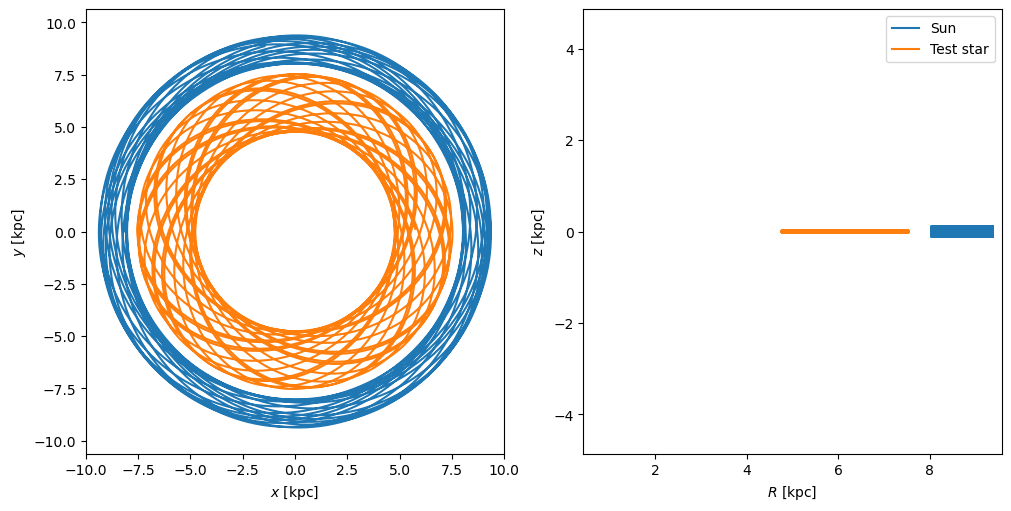

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)

sun_orbit.plot(['x', 'y'], axes=axs[0])
test_star_orbit.plot(['x', 'y'], axes=axs[0])
axs[0].set_xlim((-10, 10))
axs[0].set_ylim((-10, 10))

sun_orbit.cylindrical.plot(
    ['rho', 'z'],
    axes=axs[1],
    auto_aspect=False,
    labels=[r'$R$ [kpc]', r'$z$ [kpc]'],
    label='Sun',
)
test_star_orbit.cylindrical.plot(
    ['rho', 'z'],
    axes=axs[1],
    auto_aspect=False,
    labels=[r'$R$ [kpc]', r'$z$ [kpc]'],
    label='Test star',
)
axs[1].set_xlim((0, 10))
axs[1].set_ylim((-5, 5))
axs[1].legend()

plt.show()

In [14]:
# Orbital characteristics
print(
    'Rguide = ', test_star_orbit.guiding_radius(), 
    '\nZmax = ', test_star_orbit.zmax(), 
    '\ne = ', test_star_orbit.eccentricity()
)

Rguide =  5.8722358219805155 kpc 
Zmax =  0.02386319454577346 kpc 
e =  0.2248967640443839


        Use name instead. [gala.dynamics.core]


In [15]:
# Energy & angular momentum
print(
    'E = ', test_star_orbit.energy()[0], # first timestep
    '\nLz = ', test_star_orbit.angular_momentum()[2,0]
)

E =  -0.1502587288849785 kpc2 / Myr2 
Lz =  -1.4109650805159375 kpc2 / Myr


        Use name instead. [gala.dynamics.core]


        Use name instead. [gala.dynamics.core]


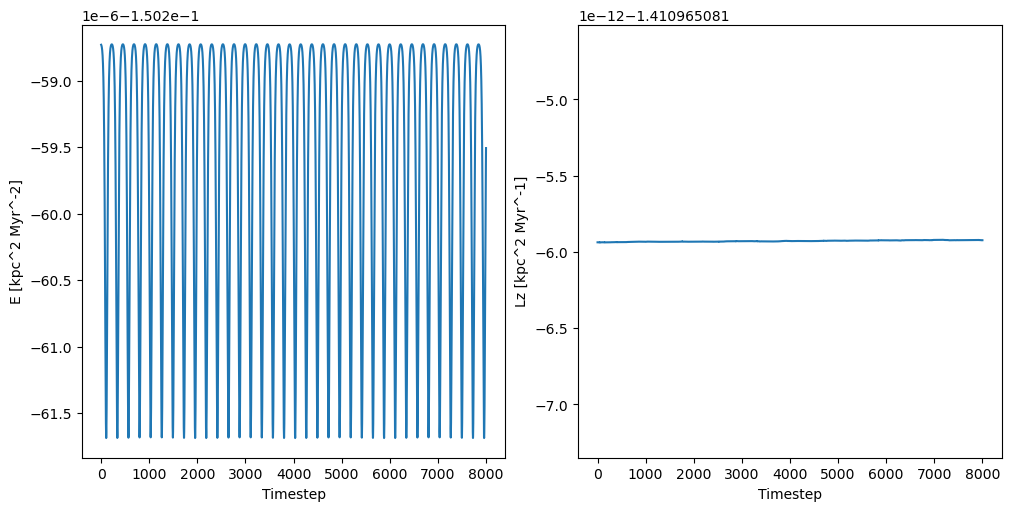

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)

# axs[0].plot(sun_orbit.energy(), label='Sun')
axs[0].plot(test_star_orbit.energy(), label='Test star')
axs[0].set_xlabel('Timestep')
axs[0].set_ylabel('E [kpc^2 Myr^-2]')

# axs[1].plot(sun_orbit.angular_momentum()[2], label='Sun')
axs[1].plot(test_star_orbit.angular_momentum()[2], label='Test star')
axs[1].set_xlabel('Timestep')
axs[1].set_ylabel('Lz [kpc^2 Myr^-1]')

plt.show()


## Calculate for many stars

Gala calculations take longer than galpy Staeckel approximation, so here's a subset.

In [17]:
mwm_subset = sample_rows(mwm_data, 1000)
mwm_subset

,sdss_id,sdss4_apogee_id,gaia_dr2_source_id,gaia_dr3_source_id,tic_v8_id,healpix,lead,version_id,catalogid,catalogid21,...,c_n,e_c_n,gal_r,gal_phi,gal_z,galpy_r_guide,galpy_z_max,galpy_ecc,galpy_E,galpy_Lz
0,73510475,2M06125470-0636003,3019713066832553472,3019713066832553472,72486737,109444,gaia_dr3_source,31,63050395094486403,4469606359,...,-0.373927,0.019628,14.010848,-164.685204,-1.301925,12.882700,1.421608,0.074018,-22708.801548,2686.062098
1,117526947,2M00000068+5710233,421077597267551104,421077597267551104,346554778,15664,gaia_dr3_source,31,63050396594779936,4291468652,...,-0.140289,0.019461,8.458404,175.658287,-0.040752,8.762909,0.728177,0.052904,-38236.161761,1912.492615
2,85842075,NaN,4168807648202356224,4168807648202356224,297289759,111227,tic_v8,21,4873422205,4873422205,...,0.032410,0.017816,3.521867,151.624847,1.050499,2.603668,1.334816,0.299198,-85960.384530,529.947210
3,88665467,2M16353099+0002315,4383550932057855232,4383550932057855232,58028284,97890,gaia_dr3_source,31,63050395711648022,5172784307,...,-0.083677,0.016134,5.402486,171.597941,1.668497,5.152484,2.406385,0.095261,-54818.626085,1162.379693
4,85251670,2M17222963-1335091,4138548817633183616,4138548817633183616,429832750,121459,gaia_dr3_source,31,63050395513222800,4864939925,...,-0.162386,0.018191,3.711787,167.397325,1.041048,3.190246,1.103135,0.094625,-81560.472504,683.963679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,101621413,2M08594260-0005180,5764605225227401088,5764605225227401088,817238,98752,gaia_dr3_source,31,63050396004799471,4492124021,...,-0.188736,0.016196,9.433963,-171.517524,1.011155,9.229324,1.071696,0.054552,-35738.130555,2002.690411
996,59000838,NaN,1083433542258473600,1083433542258473600,80946043,14057,tic_v8,25,27021599489030731,4358467499,...,-0.133947,0.016715,8.590874,178.786543,0.342765,6.738745,0.747918,0.216819,-47505.708335,1506.646894
997,57554784,2M07525476+2912200,875840077578367616,875840077578367616,171299654,50600,gaia_dr3_source,31,63050394825358148,4554588435,...,-0.222899,0.015566,9.319544,-178.491409,0.602590,10.386278,0.804376,0.121313,-30960.312129,2222.863512
998,91776140,2M04280173-6418590,4675016311937202176,4675016311937202176,38760386,186999,gaia_dr3_source,31,63050395795443233,5922038875,...,-0.043571,0.033378,8.330808,-160.248276,-2.317540,6.261145,2.598363,0.225820,-46164.807166,1406.112404


In [18]:
stars_coord = coord.SkyCoord(
    ra=mwm_subset['ra'].to_numpy() * u.deg, 
    dec=mwm_subset['dec'].to_numpy() * u.deg, 
    distance=mwm_subset['r_med_photogeo'].to_numpy()/1000 * u.kpc, 
    pm_ra_cosdec=mwm_subset['pmra'].to_numpy() * u.mas / u.yr,
    pm_dec=mwm_subset['pmde'].to_numpy() * u.mas / u.yr,
    radial_velocity=mwm_subset['v_rad'].to_numpy() * u.km / u.s,
    frame=coord.ICRS()
)

In [19]:
stars_galcen = stars_coord.transform_to(galcen_frame)
stars_galcen

<SkyCoord (Galactocentric: galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    (266.4051, -28.936175)>, galcen_distance=8.122 kpc, galcen_v_sun=(12.9, 245.6, 7.78) km / s, z_sun=20.8 pc, roll=0.0 deg): (x, y, z) in kpc
    [(-13.51331158, -3.70057509e+00, -1.30192504e+00),
     ( -8.43413065,  6.40340726e-01, -4.07518064e-02),
     ( -3.09873106,  1.67374162e+00,  1.05049857e+00),
     ( -5.34450164,  7.89403586e-01,  1.66849680e+00),
     ( -3.62235671,  8.09870301e-01,  1.04104835e+00),
     ( -8.03779054,  6.49470566e-01,  6.46230720e-01),
     (-10.91615046,  1.43184448e+00, -1.96268687e-01),
     (-13.82180397, -3.16347555e+00, -7.66583561e-01),
     (-11.85266637,  6.34718367e+00,  1.45385338e+00),
     (-10.35141535,  1.99450418e+00,  6.53867760e-01),
     (-12.38104682, -2.37280039e+00,  4.31439681e-01),
     ( -9.2034345 ,  6.33363439e+00, -6.41724941e-01),
     (-12.27838257,  7.59567903e-01,  1.29150028e-01),
     ( -4.60488156,  2.02126768e+00, -1.77970491e-01),
     ( -8.4

In [20]:
stars_w0 = gd.PhaseSpacePosition(stars_galcen.data)
stars_orbit = mw_potential.integrate_orbit(stars_w0, t=sun_orbit.t)

        Use name instead. [gala.dynamics.core]


        Use name instead. [gala.dynamics.core]


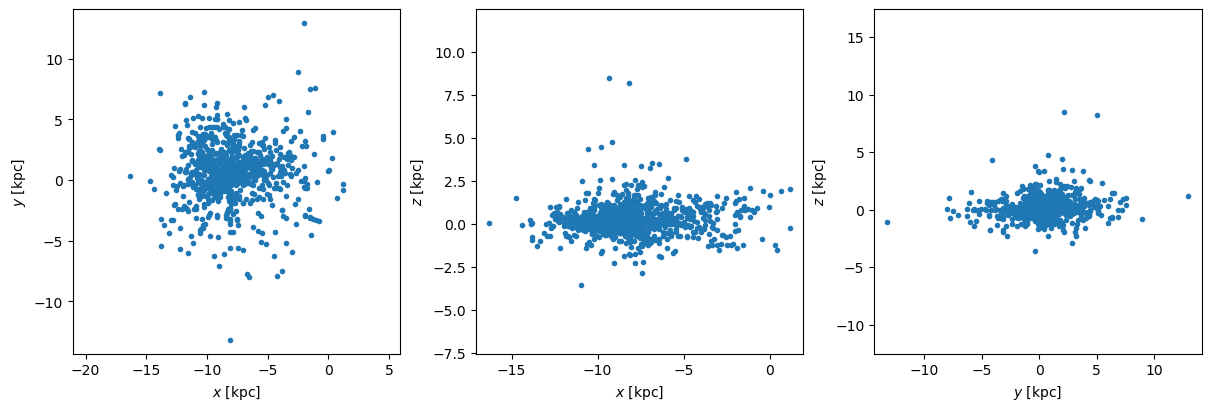

In [28]:
_ = stars_w0.plot()

In [60]:
stars_orbit[1000].guiding_radius(mw_potential)

<Quantity [11.98256374,  8.27153864,  2.5428047 ,  4.95922672,  3.10780561,
            8.04021431, 10.06652746, 13.40279962, 10.74314196,  9.83773176,
           12.00903827, 10.3962726 , 12.31052932,  3.93125392,  8.07049127,
           12.23619928,  8.76117102,  8.74953532, 10.66622798,  1.48517908,
            9.25374927,  4.41009386,  2.74133461, 12.7741932 ,  3.09519547,
            7.99160478,  9.31867888,  7.16411905,  7.48981008,  6.81647019,
            8.91710088, 10.24179315,  8.99902467,  9.13556804,  5.33201632,
            5.65120927, 10.15848577, 10.80698635,  9.77193752,  7.35430642,
           11.38048908,  2.04319417,  5.88587256,  8.55442373,  5.77079523,
            5.56436948, 10.3308777 ,  7.75606604, 11.97948703,  6.84517717,
            6.80505852, 12.15749861,  8.6141511 , 10.50714845,  4.57193614,
           10.17498303,  6.01954523, 11.89394326,  6.33736364,  5.39673121,
            5.80487331,  6.66535569,  8.29218054,  9.85416977,  7.38007216,
            

In [50]:
stars_orbit.energy(mw_potential)

<Quantity [[-0.11447499, -0.13380002, -0.18756657, ..., -0.12563886,
            -0.14202391, -0.12261806],
           [-0.11447499, -0.13380001, -0.1875665 , ..., -0.12563886,
            -0.14202391, -0.12261806],
           [-0.11447499, -0.1338    , -0.18756644, ..., -0.12563886,
            -0.14202391, -0.12261806],
           ...,
           [-0.11447505, -0.13379986, -0.18756665, ..., -0.12563876,
            -0.14202391, -0.12261805],
           [-0.11447505, -0.13379986, -0.1875667 , ..., -0.12563876,
            -0.14202391, -0.12261805],
           [-0.11447505, -0.13379986, -0.18756675, ..., -0.12563875,
            -0.14202391, -0.12261805]] kpc2 / Myr2>

/opt/anaconda3/envs/chemical-clocks/lib/python3.12/site-packages/gala/dynamics/core.py:894: RuntimeWarning: invalid value encountered in sqrt
  vc = np.sqrt(R * np.abs(dPhi_dR))
        Use name instead. [gala.dynamics.core]


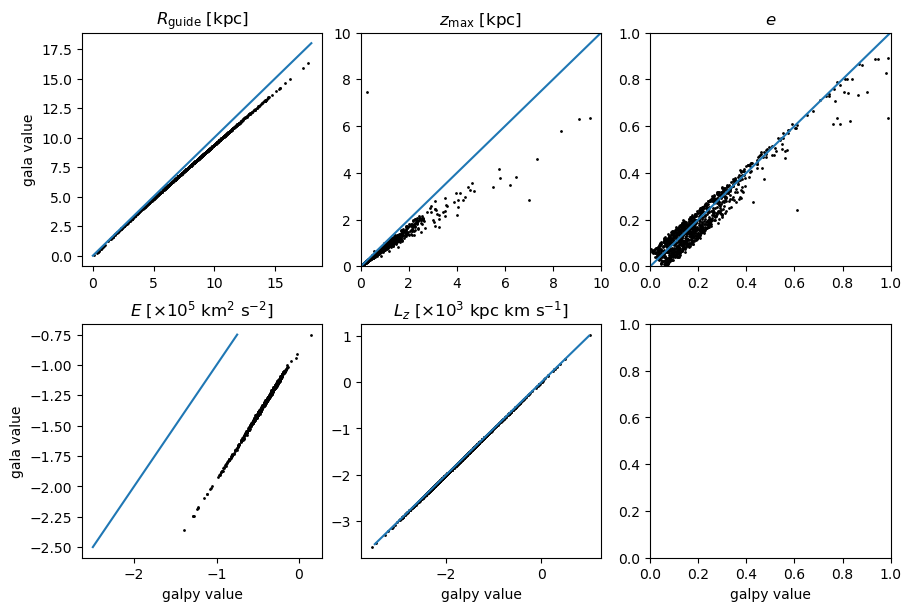

In [ ]:
# Compare galpy vs gala
fig, axs = plt.subplots(2, 3, figsize=(9, 6), constrained_layout=True)

kwargs = dict(s=1, c='k')

axs[0,0].set_title(r'$R_{\rm guide}$ [kpc]')
axs[0,0].plot([0, 18], [0, 18])
axs[0,0].scatter(mwm_subset['galpy_r_guide'], stars_orbit[0].guiding_radius(mw_potential), **kwargs)
# axs[0,1].set_xlim((0, 10))
# axs[0,1].set_ylim((0, 10))

axs[0,1].set_title(r'$z_{\rm max}$ [kpc]')
axs[0,1].plot([0, 10], [0, 10])
axs[0,1].scatter(mwm_subset['galpy_z_max'], stars_orbit.zmax(), **kwargs)
axs[0,1].set_xlim((0, 10))
axs[0,1].set_ylim((0, 10))

axs[0,2].set_title(r'$e$')
axs[0,2].plot([0, 1], [0, 1])
axs[0,2].scatter(mwm_subset['galpy_ecc'], stars_orbit.eccentricity(), **kwargs)
axs[0,2].set_xlim((0, 1))
axs[0,2].set_ylim((0, 1))

axs[1,0].set_title(r'$E$ [$\times10^5$ km$^{2}$ s$^{-2}$]')
axs[1,0].plot([-2.5, -0.75], [-2.5, -0.75])
axs[1,0].scatter(mwm_subset['galpy_E']/1e5, stars_orbit.energy(mw_potential)[0].to(u.km**2/u.s**2)/1e5, **kwargs)

axs[1,1].set_title(r'$L_z$ [$\times 10^3$ kpc km s$^{-1}$]')
axs[1,1].plot([-3.5, 1], [-3.5, 1])
axs[1,1].scatter(-mwm_subset['galpy_Lz']/1e3, stars_orbit.angular_momentum()[2,0].to(u.km*u.kpc/u.s)/1e3, **kwargs)

for ax in axs[-1]:
    ax.set_xlabel('galpy value')
for ax in axs[:,0]:
    ax.set_ylabel('gala value')

plt.show()